# :)

In [1]:
import mne
import os
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy.signal import hilbert, butter, filtfilt

In [2]:
# Specify the path to your EDF file
# 1
file_name = 'aaaaacyf_s009_t001.edf'
folder_path = 'C:/Users/Atena/Documents/tuh_eeg_edf_files'
# 'C:/Users/Atena/OneDrive - University of Connecticut/DriveCbackup/ThirdPhaseofThesis/Recordings'
file_path = os.path.join(folder_path, file_name)

# Read the EDF file
raw = mne.io.read_raw_edf(file_path, preload=True)

# Get basic information
print(raw.info)
print(raw.ch_names)

# Extract signal data
data, times = raw[:]

print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

Extracting EDF parameters from C:\Users\Atena\Documents\tuh_eeg_edf_files\aaaaacyf_s009_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216575  =      0.000 ...   845.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 29 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2015-01-01 00:00:00 UTC
 nchan: 29
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG1-REF', 'EEG LOC-REF', 'EEG ROC-REF', 'EEG A1-REF', 'EEG A2-REF', 'IBI', 'BURSTS', 'SUPPR']
Data shape: (29, 216576)
Times shape: (216576,)


In [3]:
print(raw.ch_names)

['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG1-REF', 'EEG LOC-REF', 'EEG ROC-REF', 'EEG A1-REF', 'EEG A2-REF', 'IBI', 'BURSTS', 'SUPPR']


Using matplotlib as 2D backend.


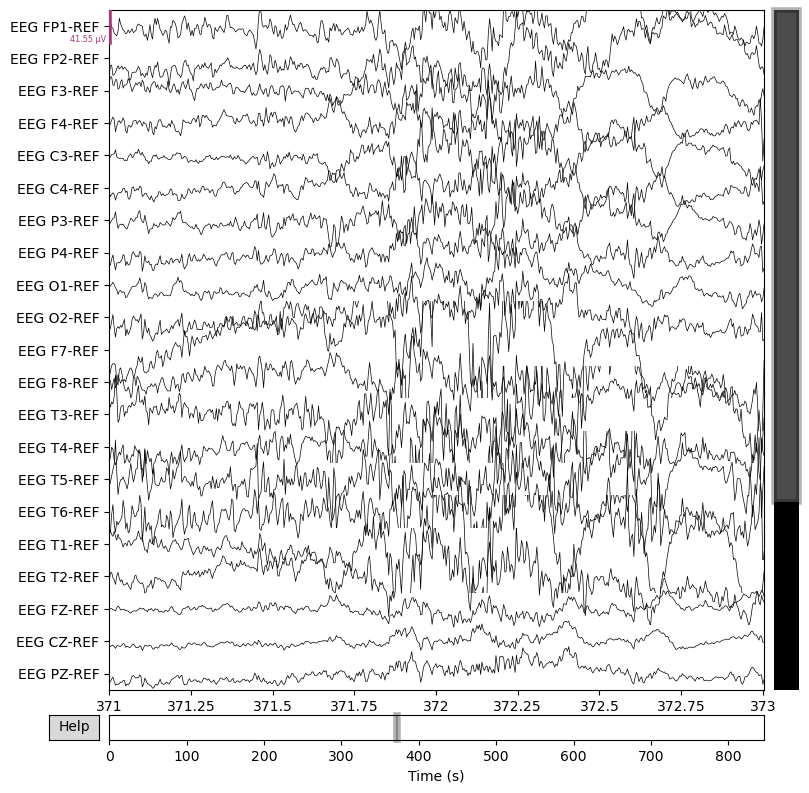

In [4]:
# raw.plot(n_channels=21, duration=times[95492] - times[94980], scalings='auto', title='Raw EEG Data', show=True, block=False)
# Plot the data
raw.plot(
    n_channels=21,
    duration=2,
    start=371,
    scalings='auto',
    title='Raw EEG Data',
    show=True,
    block=False
)

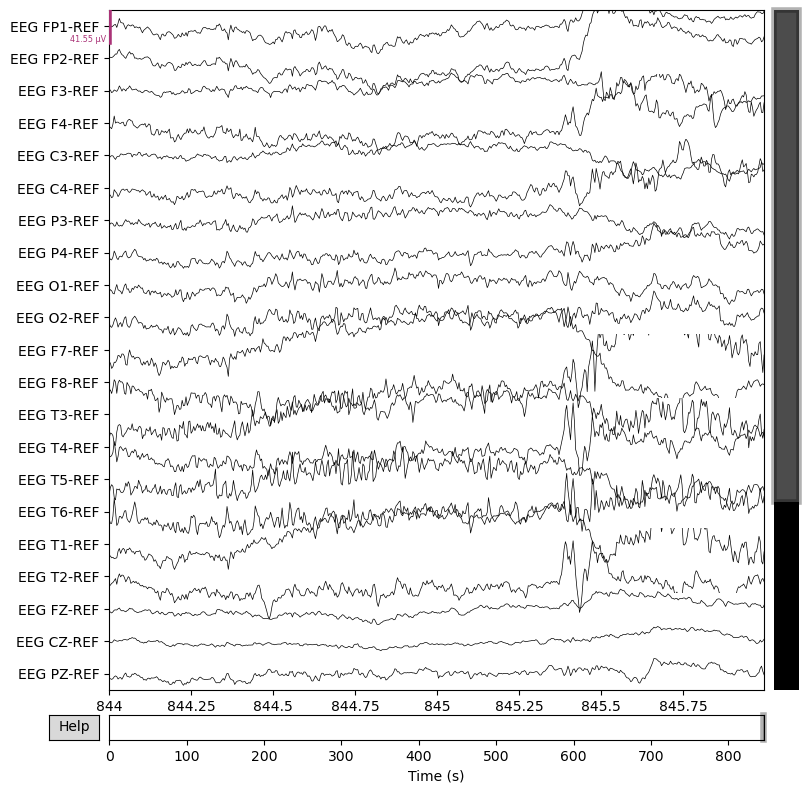

In [5]:
# raw.plot(n_channels=21, duration=times[216570] - times[216058], scalings='auto', title='Raw EEG Data', show=True, block=False)
raw.plot(
    n_channels=21,
    duration=2,
    start=844,
    scalings='auto',
    title='Raw EEG Data',
    show=True,
    block=False
)

In [6]:
preprocEEG = raw

# Band-pass filter the data
preprocEEG.filter(l_freq=1.0, h_freq=50.0)

# Notch filter to remove power line noise (assuming 60 Hz)
preprocEEG.notch_filter(freqs=60.0)

# # # Plot the raw EEG data after filtering
# # # raw.plot(n_channels=len(raw.ch_names), duration=times[-1] - times[0], scalings='auto', title='Filtered EEG Data', show=True, block=True)
# # raw.plot(n_channels=10, duration=times[65400] - times[63400], scalings='auto', title='Raw EEG Data', show=True, block=False)

# # Set up and fit the ICA
# ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
# ica.fit(raw)

# # Find and remove EOG artifacts
# try:
#     eog_inds, eog_scores = ica.find_bads_eog(raw)
#     ica.exclude.extend(eog_inds)
#     print(f"Excluded EOG components: {eog_inds}")
# except RuntimeError as e:
#     print("No EOG artifacts found:", e)

# # Find and remove ECG artifacts
# try:
#     ecg_inds, ecg_scores = ica.find_bads_ecg(raw, method='correlation', threshold='auto')
#     ica.exclude.extend(ecg_inds)
#     print(f"Excluded ECG components: {ecg_inds}")
# except ValueError as e:
#     print("No ECG artifacts found:", e)

# try:
#     emg_inds, scores = ica.find_bads_muscle(raw, threshold=4)
#     ica.exclude.extend(emg_inds)
#     print(f"Excluded EMG components: {emg_inds}")
# except RuntimeError as e:
#     print("No EMG artifacts found:", e)

# # Apply the ICA to the raw data
# raw_ica = raw.copy()
# ica.apply(raw_ica)

# # Re-reference the data to the average reference
# raw_ica.set_eeg_reference('average', projection=True)

# Plot the preprocessed EEG data
# raw_ica.plot(n_channels=len(raw_ica.ch_names), duration=times[-1] - times[0], scalings='auto', title='Preprocessed EEG Data', show=True, block=True)
# raw.plot(n_channels=33, duration=times[17000] - times[15000], scalings='auto', title='Raw EEG Data', show=True, block=False)

# # Save the preprocessed data to a new file (optional)
# preprocessed_file_path = 'C:/Users/Atena/OneDrive - University of Connecticut/DriveCbackup/ThirdPhaseofThesis/Recordings/preprocessed_data.fif'
# raw_ica.save(preprocessed_file_path, overwrite=True)

# preprocEEG = raw_ica

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished


<RawEDF | aaaaacyf_s009_t001.edf, 29 x 216576 (846.0 s), ~48.0 MB, data loaded>

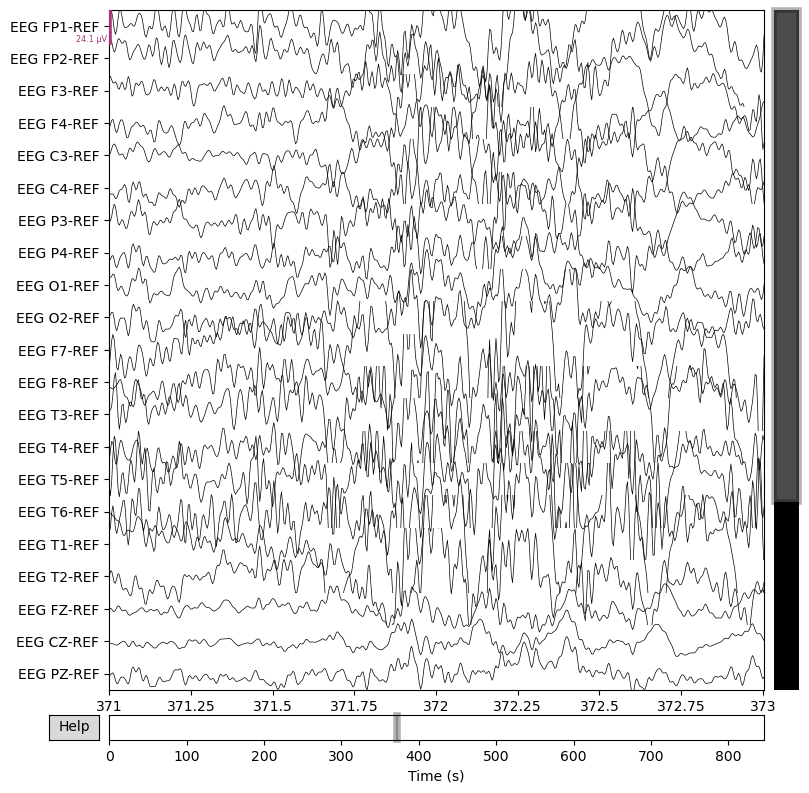

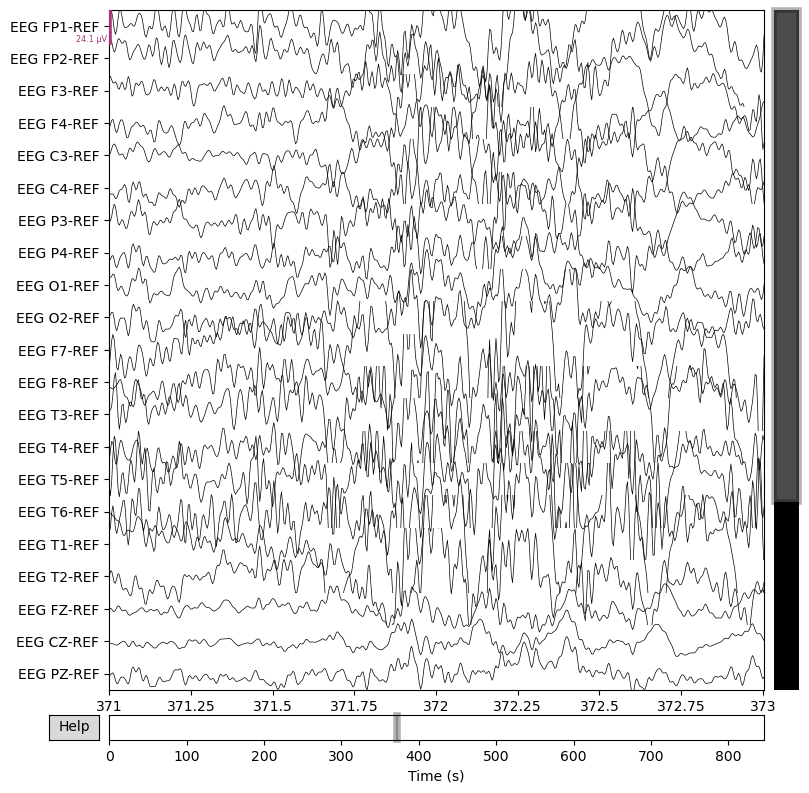

In [7]:
preprocEEG.plot(
    n_channels=21,
    duration=2,
    start=371,
    scalings='auto',
    title='Raw EEG Data',
    show=True,
    block=False
)

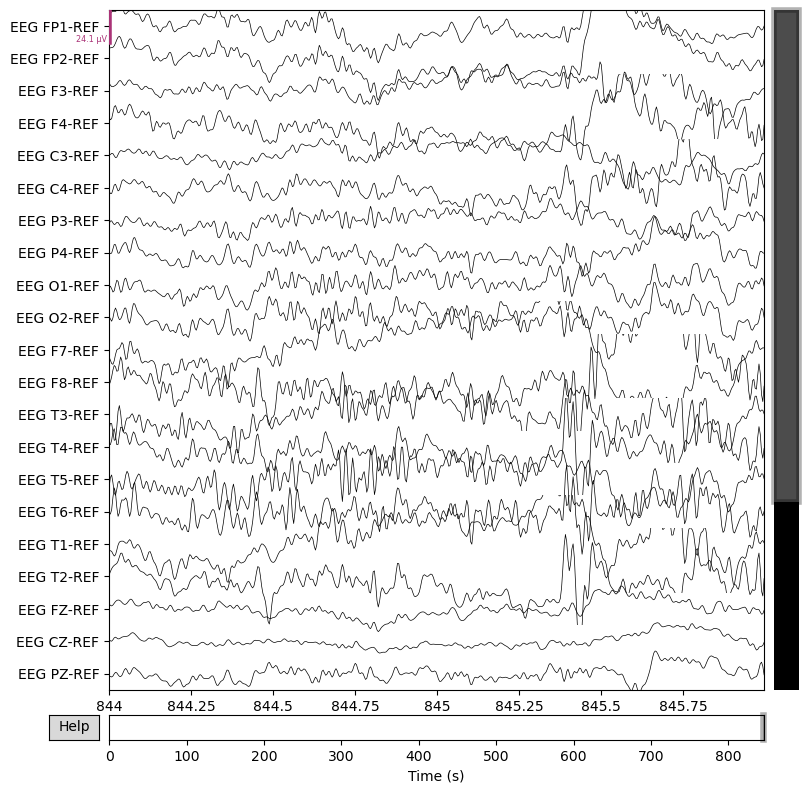

In [8]:
# Plot the preprocessed EEG data
# raw_ica.plot(n_channels=len(raw_ica.ch_names), duration=times[-1] - times[0], scalings='auto', title='Preprocessed EEG Data', show=True, block=True)
# preprocEEG.plot(n_channels=21, duration=times[25600] - times[25300], scalings='auto', title='Raw EEG Data', show=True, block=False)
preprocEEG.plot(
    n_channels=21,
    duration=2,
    start=844,
    scalings='auto',
    title='Raw EEG Data',
    show=True,
    block=False
)

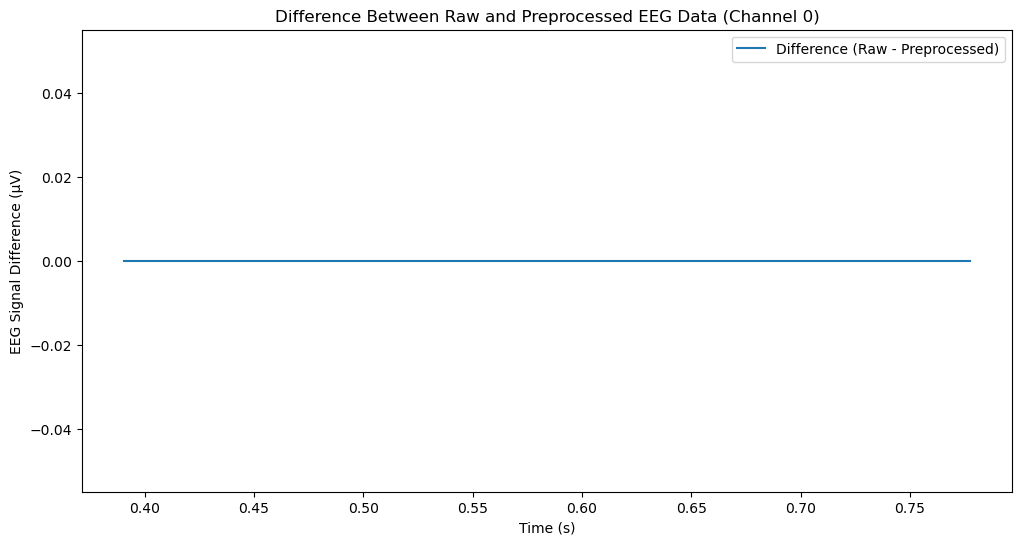

In [9]:
# preprocEEG-raw.plot(
#     n_channels=21,
#     duration=2,
#     start=844,
#     scalings='auto',
#     title='Raw EEG Data',
#     show=True,
#     block=False
# )

# Extract data and times
raw_data, raw_times = raw[:, 100:200]  # raw EEG data and times
preprocessed_data, _ = preprocEEG[:, 100:200]  # preprocessed EEG data

# Compute the difference
data_diff = raw_data - preprocessed_data

# Plot the difference for a specific channel (e.g., channel 0)
channel_idx = 0  # index of the channel you want to plot
plt.figure(figsize=(12, 6))
plt.plot(raw_times, data_diff[channel_idx, :], label='Difference (Raw - Preprocessed)')
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal Difference (µV)')
plt.title(f'Difference Between Raw and Preprocessed EEG Data (Channel {channel_idx})')
plt.legend()
plt.show()

c:\Users\Atena\anaconda3\envs\eegnetmibci\lib\site-packages\pywt\_functions.py:141: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
c:\Users\Atena\anaconda3\envs\eegnetmibci\lib\site-packages\pywt\_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


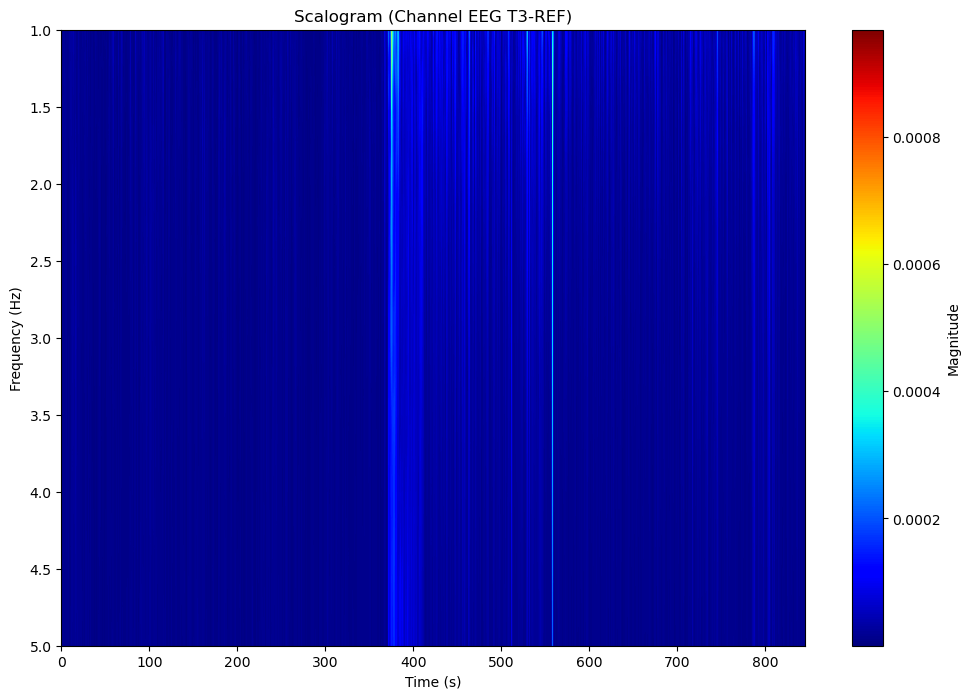

In [10]:
import pywt

# Extract signal data
data, times = preprocEEG[:]
# Select a specific channel to plot its scalogram
channel_index = 12  # Change this index to plot different channels
signal = data[channel_index, :]

# Sampling rate of the data
sampling_rate = raw.info['sfreq']
# nyquist_frequency = sampling_rate / 2
# print(f"Nyquist frequency: {nyquist_frequency} Hz")
# end_frequency = nyquist_frequency
end_frequency = 5

# Define parameters for the wavelet transform
# Choose scales to cover the frequency range up to the Nyquist frequency
frequencies = np.linspace(1, end_frequency, num=256)  # Frequencies from 1 Hz to Nyquist frequency
scales = pywt.scale2frequency('cmor', frequencies) * sampling_rate

# Perform the Continuous Wavelet Transform (CWT)
coefficients, _ = pywt.cwt(signal, scales, 'cmor', 1 / sampling_rate)

# Plot the scalogram
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coefficients), extent=[times[0], times[-1], frequencies[-1], frequencies[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Scalogram (Channel {raw.ch_names[channel_index]})')
plt.show()


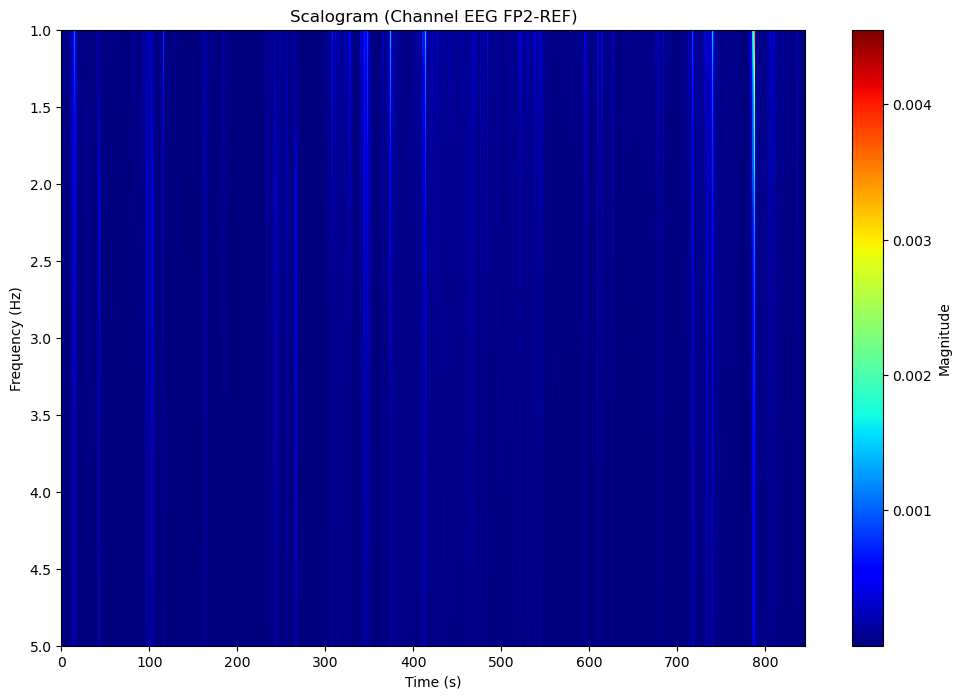

In [11]:
import pywt

# Extract signal data
data, times = preprocEEG[:]
# Select a specific channel to plot its scalogram
channel_index = 1  # Change this index to plot different channels
signal = data[channel_index, :]

# Sampling rate of the data
sampling_rate = raw.info['sfreq']
# nyquist_frequency = sampling_rate / 2
# print(f"Nyquist frequency: {nyquist_frequency} Hz")
# end_frequency = nyquist_frequency
end_frequency = 5

# Define parameters for the wavelet transform
# Choose scales to cover the frequency range up to the Nyquist frequency
frequencies = np.linspace(1, end_frequency, num=256)  # Frequencies from 1 Hz to Nyquist frequency
scales = pywt.scale2frequency('cmor', frequencies) * sampling_rate

# Perform the Continuous Wavelet Transform (CWT)
coefficients, _ = pywt.cwt(signal, scales, 'cmor', 1 / sampling_rate)

# Plot the scalogram
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coefficients), extent=[times[0], times[-1], frequencies[-1], frequencies[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Scalogram (Channel {raw.ch_names[channel_index]})')
plt.show()



In [12]:
len(preprocEEG[:])
preprocEEG[:][0][:21].shape

(21, 216576)

In [13]:
# # Define the seizure and background time intervals (in seconds)
# # 2
# seizure_start, seizure_end = 371, 410 
# background_start, background_end = 0, 311

# # Extract seizure and background epochs
# seizure_Seg = preprocEEG.copy().crop(tmin=seizure_start, tmax=seizure_end)
# background_Seg = preprocEEG.copy().crop(tmin=background_start, tmax=background_end)

In [14]:
# Define the seizure and background time intervals (in seconds)
seizure_start, seizure_end = 371, 410 
background_start_1, background_end_1 = 0, 311
background_start_2, background_end_2 = 410, 845

# Sampling frequency
sfreq = raw.info['sfreq']

# Extract seizure and background epochs
seizure_Seg = preprocEEG.copy().crop(tmin=seizure_start, tmax=seizure_end)
background_Seg_1 = preprocEEG.copy().crop(tmin=background_start_1, tmax=background_end_1)
background_Seg_2 = preprocEEG.copy().crop(tmin=background_start_2, tmax=background_end_2)

# If you need to combine the two background segments into one:
background_Seg = mne.concatenate_raws([background_Seg_1, background_Seg_2])

# this code produces up to two artificial epochs

In [15]:
len(seizure_Seg)
seizure_Seg

<RawEDF | aaaaacyf_s009_t001.edf, 29 x 9985 (39.0 s), ~2.2 MB, data loaded>

In [16]:
def bandpass_filter(data, sfreq, low_freq, high_freq):
    """
    Band-pass filter the data.
    
    Parameters:
    data (ndarray): The input signal of shape (n_channels, n_times)
    sfreq (float): The sampling frequency
    low_freq (float): The lower bound of the frequency range
    high_freq (float): The upper bound of the frequency range
    
    Returns:
    filtered_data (ndarray): The band-pass filtered signal
    """
    nyquist = 0.5 * sfreq
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

def calculate_plv(eeg_data, sfreq, low_freq, high_freq):
    """
    Calculate the Phase Locking Value (PLV) between pairs of EEG channels.
    
    Parameters:
    eeg_data (ndarray): EEG data of shape (n_channels, n_times)
    sfreq (float): Sampling frequency of the EEG data
    low_freq (float): Lower frequency bound for band-pass filter (default 8 Hz)
    high_freq (float): Upper frequency bound for band-pass filter (default 13 Hz)
    
    Returns:
    plv_matrix (ndarray): PLV matrix of shape (n_channels, n_channels)
    """
    n_channels, n_times = eeg_data.shape
    plv_matrix = np.zeros((n_channels, n_channels))
    
    # Band-pass filter the data in the specified frequency band
    eeg_data_filtered = bandpass_filter(eeg_data, sfreq, low_freq, high_freq)
    
    # Compute the analytic signal (Hilbert transform) to get the phase
    analytic_signal = hilbert(eeg_data_filtered, axis=1)
    phase_data = np.angle(analytic_signal)
    
    # Calculate PLV
    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            phase_diff = phase_data[i] - phase_data[j]
            plv = np.abs(np.sum(np.exp(1j * phase_diff)) / n_times)
            plv_matrix[i, j] = plv
            plv_matrix[j, i] = plv  # PLV is symmetric
    
    return plv_matrix

In [17]:
# Helper function to create graph from PLV matrix
def create_graph(plv_matrix, ch_names):
    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                G.add_edge(ch1, ch2, weight=weight)
    return G

# Helper function to create graph from PLV matrix
def create_graph_bi(plv_matrix, ch_names):
    # Calculate mean and standard deviation of all values in the matrix
    mean_val = np.mean(plv_matrix)
    std_val = np.std(plv_matrix)
    threshold = mean_val + std_val

    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                if weight >= threshold:
                    G.add_edge(ch1, ch2, weight=1)  # Binary edge
    return G

In [18]:
data, times = seizure_Seg[:]
plv_matrix = calculate_plv(data[:21, :], sfreq, low_freq= 13 , high_freq= 30)
print("PLV Matrix:")
print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_Seg[:]
plv_matrix = calculate_plv(data[:21, :], sfreq, low_freq= 13 , high_freq= 30)
print("PLV Matrix:")
print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_Seg.ch_names
G_seizure = create_graph(plv_seizure, ch_names[:21])
G_background = create_graph(plv_background, ch_names[:21])
G_seizure_bi = create_graph_bi(plv_seizure, ch_names[:21])
G_background_bi = create_graph_bi(plv_background, ch_names[:21])

PLV Matrix:
[[0.         0.80881313 0.08171765 0.39630432 0.43988806 0.14578225
  0.32969206 0.20722506 0.15638093 0.21754044 0.47556904 0.4454343
  0.3256195  0.35401212 0.15406694 0.17904941 0.4063464  0.44640237
  0.655342   0.29729402 0.17464872]
 [0.80881313 0.         0.09917303 0.52531447 0.55430431 0.20048654
  0.33903601 0.31259222 0.21711586 0.3225908  0.40806455 0.56419729
  0.34121365 0.47564156 0.13465061 0.27995093 0.37247669 0.55940018
  0.77459709 0.41812729 0.27622218]
 [0.08171765 0.09917303 0.         0.22104286 0.15750344 0.26634307
  0.18790757 0.34148983 0.28808521 0.29704593 0.07546219 0.12418562
  0.10452978 0.1111091  0.10309067 0.19770201 0.15539968 0.09431026
  0.0999308  0.38272837 0.38301226]
 [0.39630432 0.52531447 0.22104286 0.         0.5839871  0.57798803
  0.30763542 0.57744675 0.28822321 0.47707897 0.28915701 0.52846378
  0.25224391 0.51280399 0.07935457 0.47970753 0.24611812 0.55671608
  0.6750917  0.64967669 0.4567529 ]
 [0.43988806 0.55430431 0.157

In [19]:
print(data[:21, :].shape)
print(ch_names[:21])

(21, 190978)
['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']


In [20]:
# Parameters
epoch_length = 2  # in seconds
epoch_samples = int(epoch_length * sfreq)

def epoch_data(data, sfreq, epoch_length):
    n_channels, n_samples = data.shape
    epoch_samples = int(epoch_length * sfreq)
    n_epochs = n_samples // epoch_samples
    epochs = np.array_split(data[:, :n_epochs * epoch_samples], n_epochs, axis=1)
    return epochs

# Epoch the seizure_Seg and background_Seg
seizure_epochs = epoch_data(seizure_Seg[:][0][:21], sfreq, epoch_length)
background_epochs = epoch_data(background_Seg[:][0][:21], sfreq, epoch_length)

# Function to process epochs and calculate mean PLV
def process_epochs(epochs, sfreq, low_freq, high_freq):
    plv_all = []
    for epoch in epochs:
        plv_matrix = calculate_plv(epoch, sfreq, low_freq=low_freq, high_freq=high_freq)
        plv_all.append(plv_matrix)
    # plv_mean = np.mean(plv_all, axis=0)  # Averaging the PLV matrices
    # return plv_mean, plv_all
    return plv_all

# Calculate PLV for each epoch and the mean PLV for seizure and background data
# plv_seizure_mean, plv_seizure_all = process_epochs(seizure_epochs, sfreq, low_freq=8, high_freq=13)
# plv_background_mean, plv_background_all = process_epochs(background_epochs, sfreq, low_freq=8, high_freq=13)
plv_seizure_all = process_epochs(seizure_epochs, sfreq, low_freq=13, high_freq=30)
plv_background_all = process_epochs(background_epochs, sfreq, low_freq=13, high_freq=30)

In [21]:
len(plv_seizure_all)
plv_seizure_all[0].shape
len(seizure_epochs)
seizure_epochs[0].shape
background_epochs[0].shape

(21, 512)

In [22]:
# Create graphs and extract features for each epoch
def create_graphs(plv_all, ch_names):
    graphs = [create_graph(plv, ch_names) for plv in plv_all]
    graphs_bi = [create_graph_bi(plv, ch_names) for plv in plv_all]
    return graphs, graphs_bi

In [23]:
# Process seizure and background epochs
ch_names = seizure_Seg.ch_names[:21]
G_seizure, G_seizure_bi = create_graphs(plv_seizure_all, ch_names)
G_background, G_background_bi = create_graphs(plv_background_all, ch_names)

In [24]:
print(len(plv_seizure_all))
print(plv_seizure_all[0].shape)
print(len(plv_background_all))
print(plv_background_all[0].shape)

19
(21, 21)
373
(21, 21)


In [25]:
# Convert the list of arrays to a single 3D array
plv_seizure_all_values = np.array(plv_seizure_all)

# Calculate the mean of all values
mean_value_seizure = np.mean(plv_seizure_all_values)

# Calculate the standard deviation of all values
std_value_seizure = np.std(plv_seizure_all_values)

print(f"Mean: {mean_value_seizure}")
print(f"Standard Deviation: {std_value_seizure}")

Mean: 0.4079185260065666
Standard Deviation: 0.23526025644879894


In [26]:
# Convert the list of arrays to a single 3D array
plv_background_all_values = np.array(plv_background_all)

# Calculate the mean of all values
mean_value_background = np.mean(plv_background_all_values)

# Calculate the standard deviation of all values
std_value_background = np.std(plv_background_all_values)

print(f"Mean: {mean_value_background}")
print(f"Standard Deviation: {std_value_background}")

Mean: 0.2899027469503018
Standard Deviation: 0.20072727291150388


In [27]:
# plv_background_all

In [28]:
# Helper function to create graph from PLV matrix
def create_graph_bi_main(plv_matrix, ch_names, threshold):
    
    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                if weight >= threshold:
                    G.add_edge(ch1, ch2, weight=1)  # Binary edge
    return G

In [29]:
# Calculate mean and standard deviation of all values in the matrix
threshold = mean_value_background + std_value_background
G_seizure_bi = [create_graph_bi_main(plv, ch_names, threshold) for plv in plv_seizure_all]
G_background_bi = [create_graph_bi_main(plv, ch_names, threshold) for plv in plv_background_all]

In [30]:
G_seizure_bi 

In [32]:
electrode_names = [
'EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF',
 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF',
  'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF',
    'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']

cleaned_electrode_names = [name.replace('EEG ', '').replace('-REF', '') for name in electrode_names]

print(cleaned_electrode_names)

['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'T1', 'T2', 'FZ', 'CZ', 'PZ']


In [33]:
print(len(G_seizure_bi))
print(len(G_background_bi))

19
373


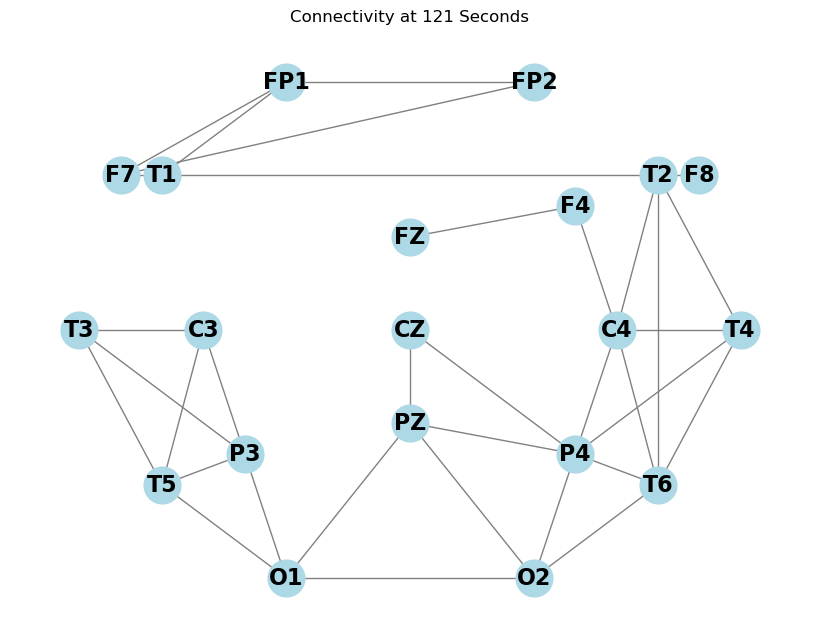

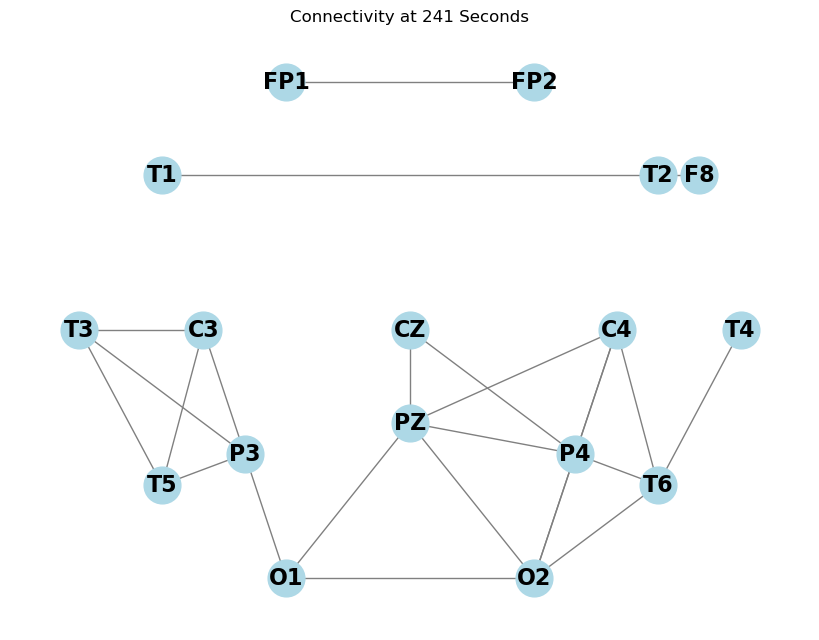

In [36]:
# Original electrode names
electrode_names = [
    'EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF',
    'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF',
    'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF',
    'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF'
]

# Simplified electrode names
simplified_names = [
    'FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4',
    'T5', 'T6', 'T1', 'T2', 'FZ', 'CZ', 'PZ'
]

# [
#     'Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
#     'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'A1', 'A2', 'Fz', 'Cz', 'Pz'
# ]

# x_coords = [
#     -0.6, 0.6, -0.4, 0.4, -0.5, 0.5, -0.5, 0.5, -0.7, 0.7,  # Fp1-Fp2, F3-F4, O1-O2
#     -0.7, 0.7, -0.6, 0.6, -0.8, 0.8, -0.8, 0.8, -0.4, 0.4,  # F7-F8, T3-T4, T5-T6
#     0.0, 0.0, 0.0,  # A1, A2, Fz, Cz, Pz
# ]

# y_coords = [
#     0.8, 0.8, 0.4, 0.4, 0.0, 0.0, -0.4, -0.4, -0.6, -0.6,  # Fp1-Fp2, F3-F4, O1-O2
#     0.2, 0.2, -0.6, -0.6, -0.8, -0.8, -0.8, -0.8, 0.0, 0.0,  # F7-F8, T3-T4, T5-T6
#     0.6, 0.0, -0.4,  # A1, A2, Fz, Cz, Pz
# ]

# # Create the position dictionary
# pos = {name: (x, y) for name, x, y in zip(simplified_names, x_coords, y_coords)}

pos = {'FP1': (-0.3, 0.8),
 'FP2': (0.3, 0.8),
 'F3': (-0.4, 0.4),
 'F4': (0.4, 0.4),
 'C3': (-0.5, 0.0),
 'C4': (0.5, 0.0),
 'P3': (-0.4, -0.4),
 'P4': (0.4, -0.4),
 'O1': (-0.3, -0.8),
 'O2': (0.3, -0.8),
 'F7': (-0.7, 0.5),
 'F8': (0.7, 0.5),
 'T3': (-0.8, 0),
 'T4': (0.8, 0),
 'T5': (-0.6, -0.5),
 'T6': (0.6, -0.5),
 'T1': (-0.6, 0.5),
 'T2': (0.6, 0.5),
 'FZ': (0.0, 0.3),
 'CZ': (0.0, 0.0),
 'PZ': (0.0, -0.3)}

# Create the mapping dictionary
label_mapping = dict(zip(electrode_names, simplified_names))

# Function to relabel nodes
def relabel_nodes(G, mapping):
    return nx.relabel_nodes(G, mapping, copy=True)

# Plot only the first and third graphs
for i in range(0, 185, 60):  # Indexes for the first and third graphs
    G = G_background_bi[i]
    # Relabel the nodes in the graph
    G = relabel_nodes(G, label_mapping)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
    plt.title(f'Connectivity at {2*i+1} Seconds')
    plt.show()


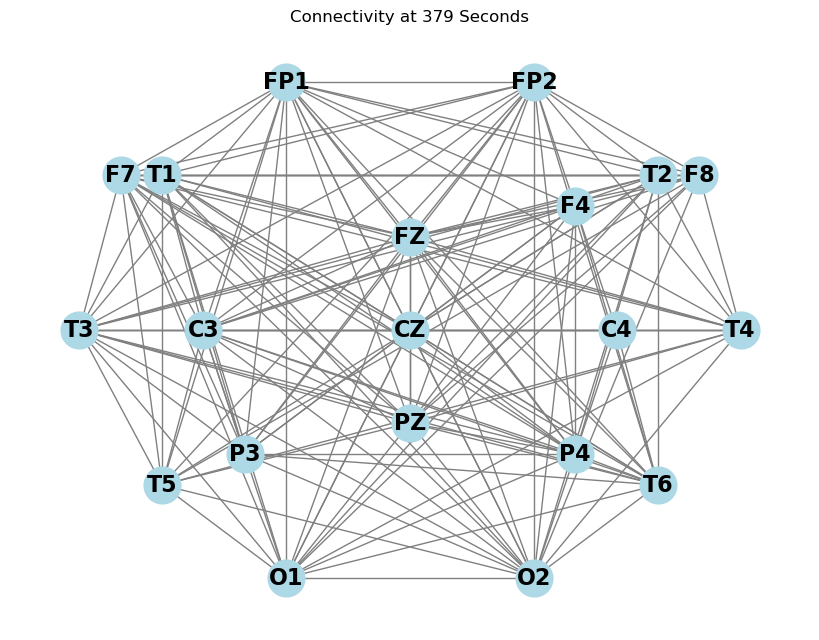

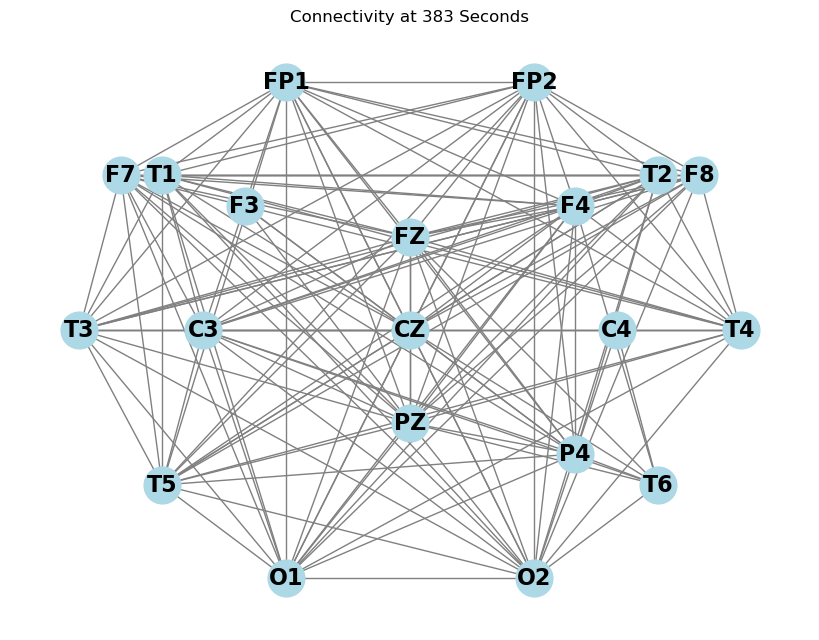

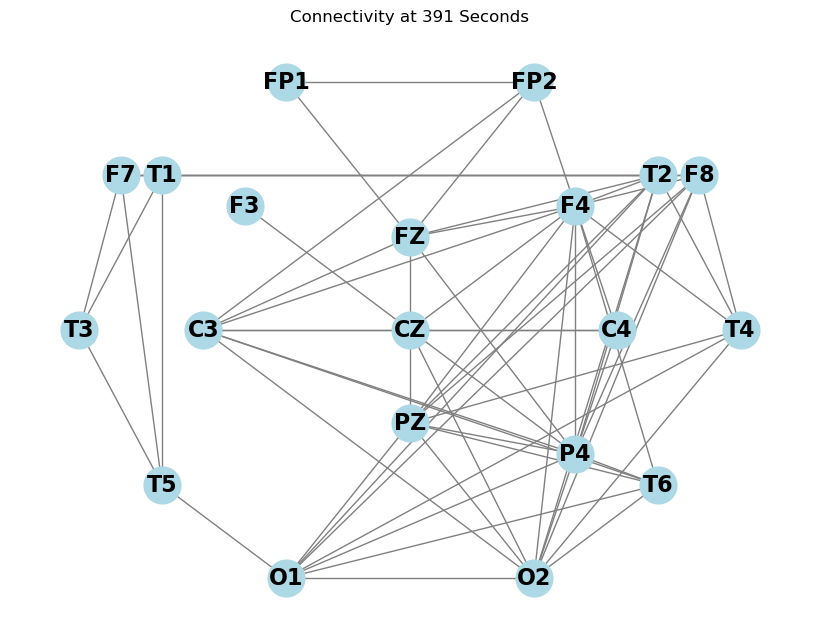

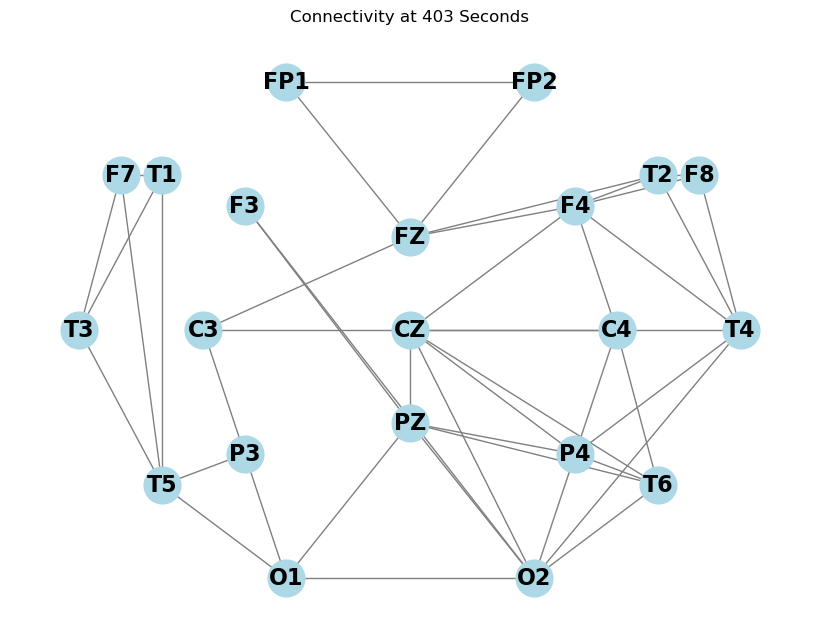

In [42]:
# Plot only the first and third graphs
for i in range(0, 19, 2):  # Indexes for the first and third graphs
    G = G_seizure_bi[i]
        # Relabel the nodes in the graph
    G = relabel_nodes(G, label_mapping)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
    plt.title(f'Connectivity at {2*i+371} Seconds')
    plt.show()


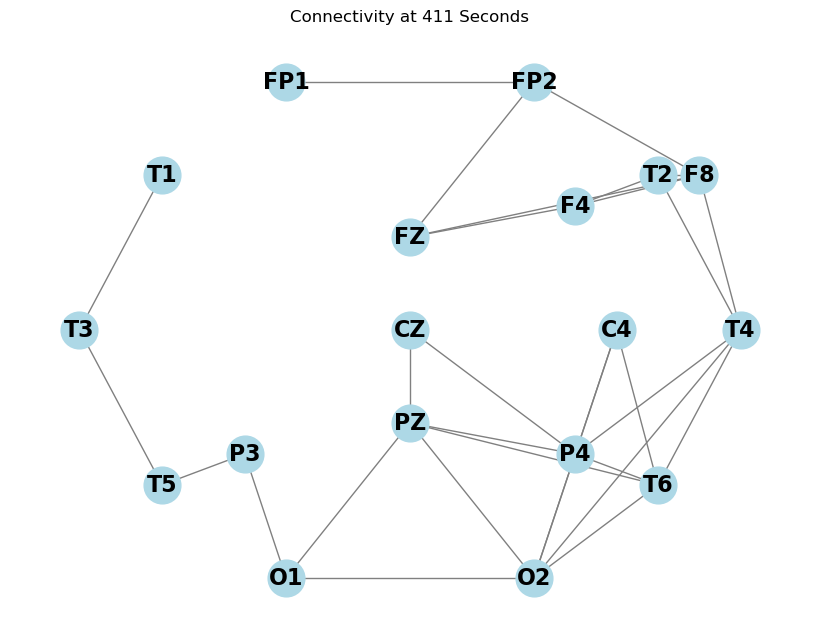

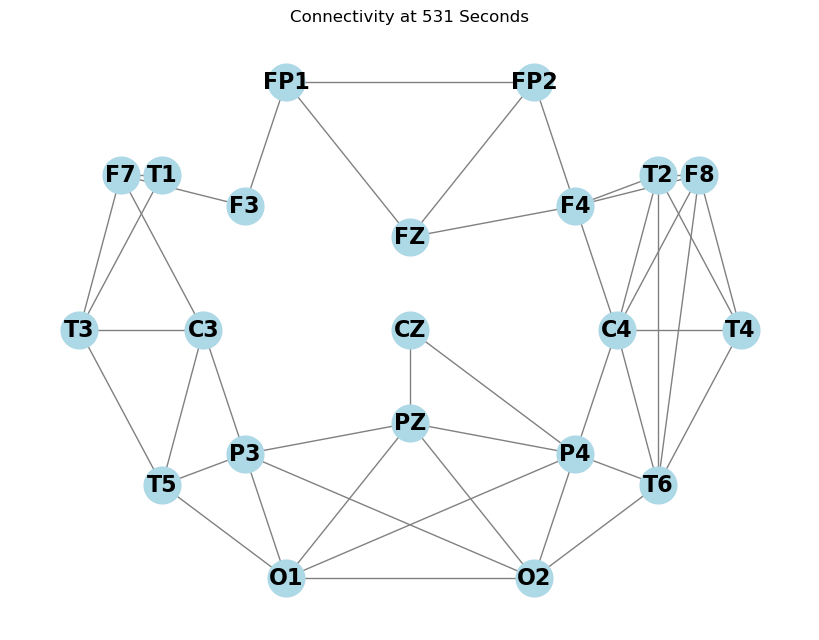

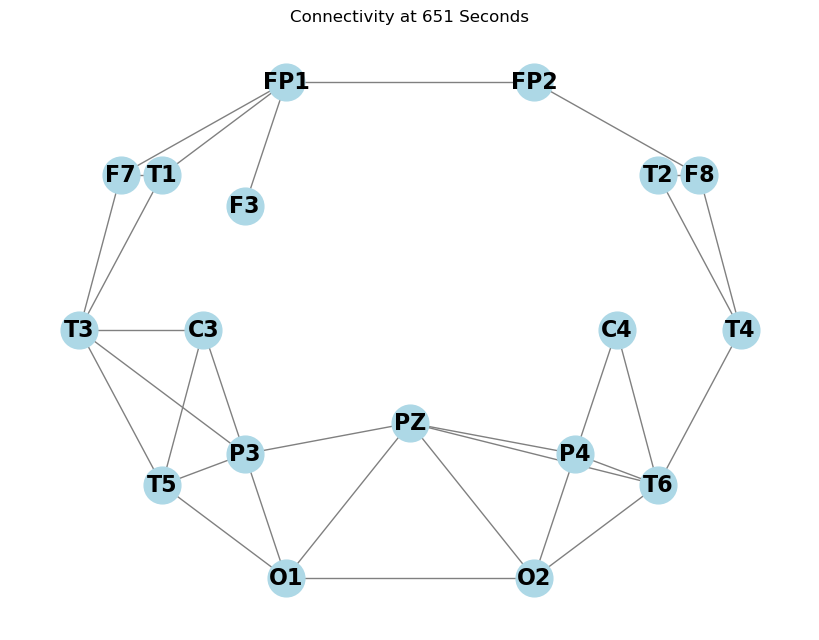

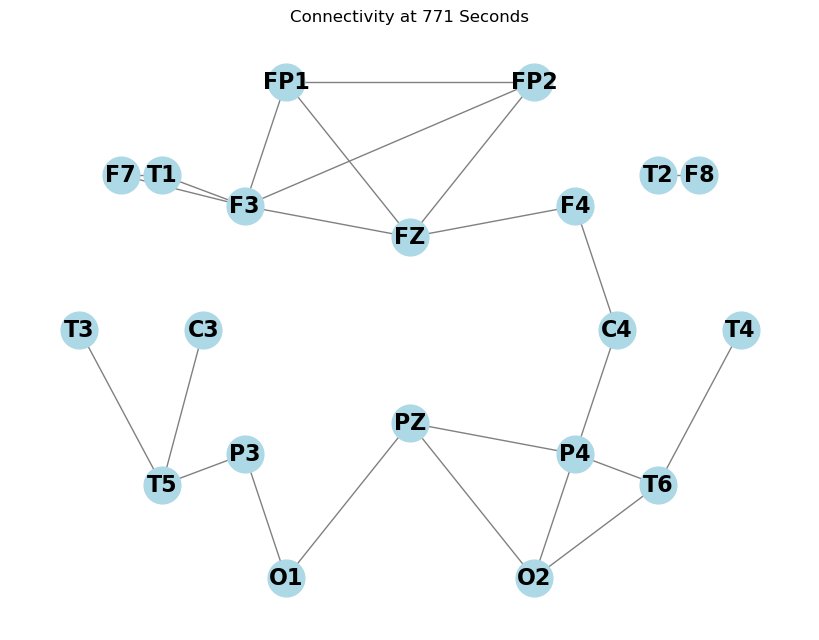

In [40]:
# for G in G_background_bi:
# Plot only the first and third graphs
for i in range(186, 373, 60):  # Indexes for the first and third graphs
    G = G_background_bi[i]
    # Relabel the nodes in the graph
    G = relabel_nodes(G, label_mapping)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
    plt.title(f'Connectivity at {2*(i-186)+411} Seconds')
    plt.show()

In [43]:
def feature_extract_bi(graph):
    features = {}
    
    features['density'] = nx.density(graph)
    # features['clustering_coefficient'] = nx.average_clustering(graph)
        # Calculate clustering coefficient with error handling

    try:
        if len(graph) > 0 and len([n for n in graph.nodes() if nx.clustering(graph, n) > 0]) > 0:
            features['clustering_coefficient'] = nx.average_clustering(graph)
        else:
            features['clustering_coefficient'] = 0
    except ZeroDivisionError:
        features['clustering_coefficient'] = 0

    features['number_of_connected_components'] = nx.number_connected_components(graph)
        
    return features

In [44]:
features_seizure_bi = [feature_extract_bi(G) for G in G_seizure_bi]
print(features_seizure_bi)

[{'density': 0.30409356725146197, 'clustering_coefficient': 0.5745614035087719, 'number_of_connected_components': 1}, {'density': 0.4368421052631579, 'clustering_coefficient': 0.7007167832167831, 'number_of_connected_components': 1}, {'density': 0.5578947368421052, 'clustering_coefficient': 0.7551033688533688, 'number_of_connected_components': 1}, {'density': 0.8538011695906432, 'clustering_coefficient': 0.8993720933349415, 'number_of_connected_components': 1}, {'density': 0.8, 'clustering_coefficient': 0.8956978479037303, 'number_of_connected_components': 1}, {'density': 0.7842105263157895, 'clustering_coefficient': 0.9148988365435734, 'number_of_connected_components': 1}, {'density': 0.7578947368421053, 'clustering_coefficient': 0.9254575163398695, 'number_of_connected_components': 1}, {'density': 0.6608187134502924, 'clustering_coefficient': 0.8356666725087778, 'number_of_connected_components': 1}, {'density': 0.5263157894736842, 'clustering_coefficient': 0.7277690146111199, 'number

In [45]:
features_background_bi = [feature_extract_bi(G) for G in G_background_bi]
print(features_background_bi)

[{'density': 0.21323529411764705, 'clustering_coefficient': 0.5352941176470588, 'number_of_connected_components': 1}, {'density': 0.275, 'clustering_coefficient': 0.502529761904762, 'number_of_connected_components': 2}, {'density': 0.21637426900584794, 'clustering_coefficient': 0.630827067669173, 'number_of_connected_components': 1}, {'density': 0.15789473684210525, 'clustering_coefficient': 0.5614035087719299, 'number_of_connected_components': 2}, {'density': 0.16374269005847952, 'clustering_coefficient': 0.5157894736842106, 'number_of_connected_components': 2}, {'density': 0.1978021978021978, 'clustering_coefficient': 0.511904761904762, 'number_of_connected_components': 3}, {'density': 0.29239766081871343, 'clustering_coefficient': 0.6434419381787803, 'number_of_connected_components': 2}, {'density': 0.22105263157894736, 'clustering_coefficient': 0.6095238095238094, 'number_of_connected_components': 1}, {'density': 0.24561403508771928, 'clustering_coefficient': 0.7117794486215538, 'n

In [46]:
# Initialize lists to collect each feature
density_seizure_list = []
clustering_coefficient_seizure_list = []
number_of_connected_components_seizure_list = []

# Collect each feature into lists
for features in features_seizure_bi:
    density_seizure_list.append(features['density'])
    clustering_coefficient_seizure_list.append(features['clustering_coefficient'])
    number_of_connected_components_seizure_list.append(features['number_of_connected_components'])

# Convert lists to numpy arrays for easier computation
density_seizure_array = np.array(density_seizure_list)
clustering_coefficient_seizure_array = np.array(clustering_coefficient_seizure_list)
number_of_connected_components_seizure_array = np.array(number_of_connected_components_seizure_list)

# Calculate mean and standard deviation for each feature
mean_density_seizure = np.mean(density_seizure_array)
std_density_seizure = np.std(density_seizure_array)

mean_clustering_coefficient_seizure = np.mean(clustering_coefficient_seizure_array)
std_clustering_coefficient_seizure = np.std(clustering_coefficient_seizure_array)

mean_number_of_connected_components_seizure = np.mean(number_of_connected_components_seizure_array)
std_number_of_connected_components_seizure = np.std(number_of_connected_components_seizure_array)

# Print results
print(f"Density Seizure: Mean = {mean_density_seizure}, Standard Deviation = {std_density_seizure}")
print(f"Clustering Coefficient Seizure: Mean = {mean_clustering_coefficient_seizure}, Standard Deviation = {std_clustering_coefficient_seizure}")
print(f"Number of Connected Components Seizure: Mean = {mean_number_of_connected_components_seizure}, Standard Deviation = {std_number_of_connected_components_seizure}")


Density Seizure: Mean = 0.4393703557138459, Standard Deviation = 0.2218022247527313
Clustering Coefficient Seizure: Mean = 0.7247086554458119, Standard Deviation = 0.1166916120644827
Number of Connected Components Seizure: Mean = 1.105263157894737, Standard Deviation = 0.30689220499185793


In [47]:
# Initialize lists to collect each feature
density_background_list = []
clustering_coefficient_background_list = []
number_of_connected_components_background_list = []

# Collect each feature into lists
for features in features_background_bi:
    density_background_list.append(features['density'])
    clustering_coefficient_background_list.append(features['clustering_coefficient'])
    number_of_connected_components_background_list.append(features['number_of_connected_components'])

# Convert lists to numpy arrays for easier computation
density_background_array = np.array(density_background_list)
clustering_coefficient_background_array = np.array(clustering_coefficient_background_list)
number_of_connected_components_background_array = np.array(number_of_connected_components_background_list)

# Calculate mean and standard deviation for each feature
mean_density_background = np.mean(density_background_array)
std_density_background = np.std(density_background_array)

mean_clustering_coefficient_background = np.mean(clustering_coefficient_background_array)
std_clustering_coefficient_background = np.std(clustering_coefficient_background_array)

mean_number_of_connected_components_background = np.mean(number_of_connected_components_background_array)
std_number_of_connected_components_background = np.std(number_of_connected_components_background_array)

# Print results
print(f"Density Background: Mean = {mean_density_background}, Standard Deviation = {std_density_background}")
print(f"Clustering Coefficient Background: Mean = {mean_clustering_coefficient_background}, Standard Deviation = {std_clustering_coefficient_background}")
print(f"Number of Connected Components Background: Mean = {mean_number_of_connected_components_background}, Standard Deviation = {std_number_of_connected_components_background}")

Density Background: Mean = 0.22628610489731513, Standard Deviation = 0.09454715476772349
Clustering Coefficient Background: Mean = 0.5348283129802643, Standard Deviation = 0.1203476882814934
Number of Connected Components Background: Mean = 1.4450402144772119, Standard Deviation = 0.6633316761559869


In [58]:
# Concatenate the segments
density_combined = np.concatenate((density_background_array[:185], density_seizure_array, density_background_array[186:]))
clustering_coefficient_combined = np.concatenate((clustering_coefficient_background_array[:185], clustering_coefficient_seizure_array, clustering_coefficient_background_array[186:]))
number_of_connected_components_combined = np.concatenate((number_of_connected_components_background_array[:185], number_of_connected_components_seizure_array, number_of_connected_components_background_array[186:]))

In [56]:
density_background_array.shape

(373,)

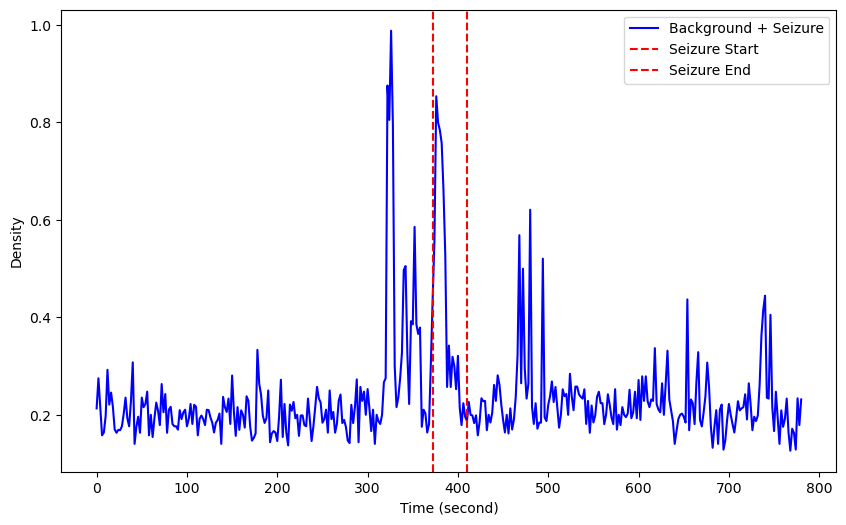

In [62]:
# # Plot comparison for density
# plt.figure(figsize=(10, 6))
# plt.plot(density_combined, label='Background + Seizure', color='blue')
# plt.axvline(x=186, color='red', linestyle='--', label='Seizure Start')
# plt.axvline(x=205, color='red', linestyle='--', label='Seizure End')
# plt.xlabel('Graph #')
# plt.ylabel('Density')
# # plt.title('Graph Densities (Background + Seizure)')
# plt.legend()
# plt.show()

length = len(density_combined)
x_values = list(range(0, 2 * length + 1, 2))
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], density_combined, label='Background + Seizure', color='blue')
plt.axvline(x=372, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=410, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Density')
# plt.title('Graph Densities (Background + Seizure)')
plt.legend()
plt.show()

# Plot comparison for clustering coefficient
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], clustering_coefficient_combined, label='Background + Seizure', color='blue')
plt.axvline(x=372, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=410, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficients (Background + Seizure)')
plt.legend()
plt.show()

# Plot comparison for number of connected components
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], number_of_connected_components_combined, label='Background + Seizure', color='blue')
plt.axvline(x=372, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=410, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Number of Connected Components')
# plt.title('Number of Connected Components (Background + Seizure)')
plt.legend()
plt.show()

In [63]:
def feature_extract(graph):
    features = {}
        
    # Clustering coefficient (considering weights)
    features['clustering_coefficient'] = nx.average_clustering(graph, weight='weight')
    
    # Diameter and average shortest path length (considering weights)
    if nx.is_connected(graph):
        features['diameter'] = nx.diameter(graph, weight='weight')
        features['average_shortest_path_length'] = nx.average_shortest_path_length(graph, weight='weight')
    else:
        features['diameter'] = float('inf')  # Use infinity if the graph is not connected
        features['average_shortest_path_length'] = float('inf')
    
    return features

In [64]:
# Assuming G_seizure and G_background are your lists of seizure and background graphs
features_seizure = [feature_extract(G) for G in G_seizure]
features_background = [feature_extract(G) for G in G_background]

In [65]:
# Initialize lists to collect each feature
# clustering_coefficient_seizure_list = []
diameter_seizure_list = []
average_shortest_path_length_seizure_list = []

# Collect each feature into lists
for features in features_seizure:
    # clustering_coefficient_seizure_list.append(features['clustering_coefficient'])
    diameter_seizure_list.append(features['diameter'])
    average_shortest_path_length_seizure_list.append(features['average_shortest_path_length'])

# # Convert lists to numpy arrays for easier computation
# clustering_coefficient_seizure_array = np.array(clustering_coefficient_seizure_list)
diameter_seizure_array = np.array(diameter_seizure_list)
average_shortest_path_length_seizure_array = np.array(average_shortest_path_length_seizure_list)

# # Repeat for background graphs
# clustering_coefficient_background_list = []
diameter_background_list = []
average_shortest_path_length_background_list = []

# Collect each feature into lists
for features in features_background:
    # clustering_coefficient_background_list.append(features['clustering_coefficient'])
    diameter_background_list.append(features['diameter'])
    average_shortest_path_length_background_list.append(features['average_shortest_path_length'])

# # Convert lists to numpy arrays for easier computation
# clustering_coefficient_background_array = np.array(clustering_coefficient_background_list)
diameter_background_array = np.array(diameter_background_list)
average_shortest_path_length_background_array = np.array(average_shortest_path_length_background_list)

In [66]:
# # Calculate mean and standard deviation for each feature for seizure graphs
# mean_clustering_coefficient_seizure = np.mean(clustering_coefficient_seizure_array)
# std_clustering_coefficient_seizure = np.std(clustering_coefficient_seizure_array)
mean_diameter_seizure = np.mean(diameter_seizure_array)
std_diameter_seizure = np.std(diameter_seizure_array)
mean_average_shortest_path_length_seizure = np.mean(average_shortest_path_length_seizure_array)
std_average_shortest_path_length_seizure = np.std(average_shortest_path_length_seizure_array)

# # Calculate mean and standard deviation for each feature for background graphs
# mean_clustering_coefficient_background = np.mean(clustering_coefficient_background_array)
# std_clustering_coefficient_background = np.std(clustering_coefficient_background_array)
mean_diameter_background = np.mean(diameter_background_array)
std_diameter_background = np.std(diameter_background_array)
mean_average_shortest_path_length_background = np.mean(average_shortest_path_length_background_array)
std_average_shortest_path_length_background = np.std(average_shortest_path_length_background_array)

# # Print results
# print(f"Clustering Coefficient Seizure: Mean = {mean_clustering_coefficient_seizure}, Standard Deviation = {std_clustering_coefficient_seizure}")
print(f"Diameter Seizure: Mean = {mean_diameter_seizure}, Standard Deviation = {std_diameter_seizure}")
print(f"Average Shortest Path Length Seizure: Mean = {mean_average_shortest_path_length_seizure}, Standard Deviation = {std_average_shortest_path_length_seizure}")

# print(f"Clustering Coefficient Background: Mean = {mean_clustering_coefficient_background}, Standard Deviation = {std_clustering_coefficient_background}")
print(f"Diameter Background: Mean = {mean_diameter_background}, Standard Deviation = {std_diameter_background}")
print(f"Average Shortest Path Length Background: Mean = {mean_average_shortest_path_length_background}, Standard Deviation = {std_average_shortest_path_length_background}")


Diameter Seizure: Mean = 0.4506540154820461, Standard Deviation = 0.10244948153588927
Average Shortest Path Length Seizure: Mean = 0.24314289253805974, Standard Deviation = 0.05920590007986762
Diameter Background: Mean = 0.3163144628564104, Standard Deviation = 0.07577595700878335
Average Shortest Path Length Background: Mean = 0.1645810290148399, Standard Deviation = 0.043731154469571515


In [67]:
# Concatenate the segments
diameter_combined = np.concatenate((diameter_background_array[:185], diameter_seizure_array, diameter_background_array[186:]))
average_shortest_path_length_combined = np.concatenate((average_shortest_path_length_background_array[:185], average_shortest_path_length_seizure_array, average_shortest_path_length_background_array[186:]))

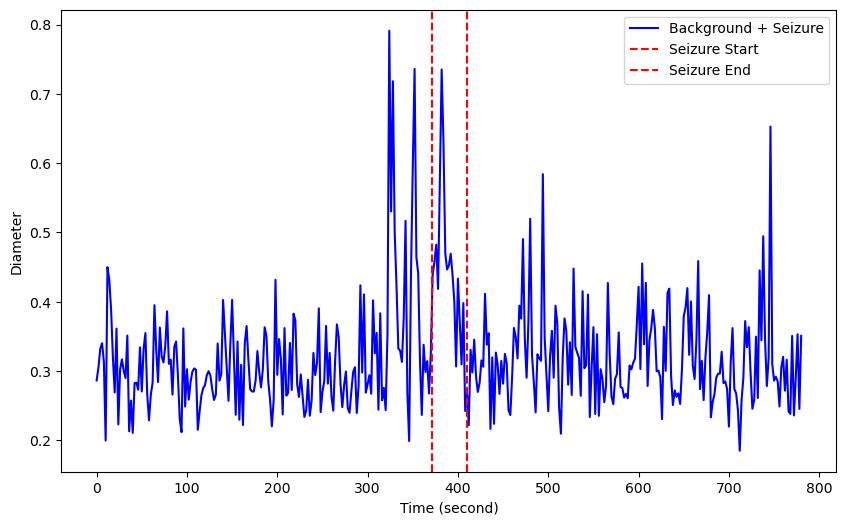

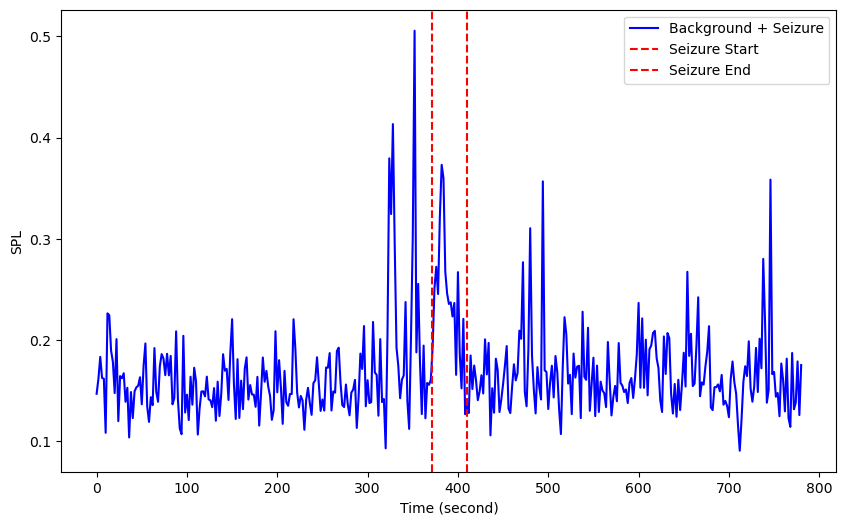

In [69]:
# Plot comparison for clustering coefficient
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], diameter_combined, label='Background + Seizure', color='blue')
plt.axvline(x=371, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=410, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Diameter')
plt.legend()
plt.show()

# Plot comparison for number of connected components
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], average_shortest_path_length_combined, label='Background + Seizure', color='blue')
plt.axvline(x=371, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=410, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('SPL')
plt.legend()
plt.show()